In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
df = pd.read_excel("data/my_ts.xlsx")

In [16]:
df.set_index("date", inplace=True)

In [17]:
from arml import unit_root_test, plot_PACF_ACF, cat_forecaster, lightGBM_forecaster, xgboost_forecaster

In [18]:
unit_root_test(df["electricity"], method="ADF")

ADF p-value: 0.009384 and data is stationary at 5% significance level


(0.009383682866887066, None)

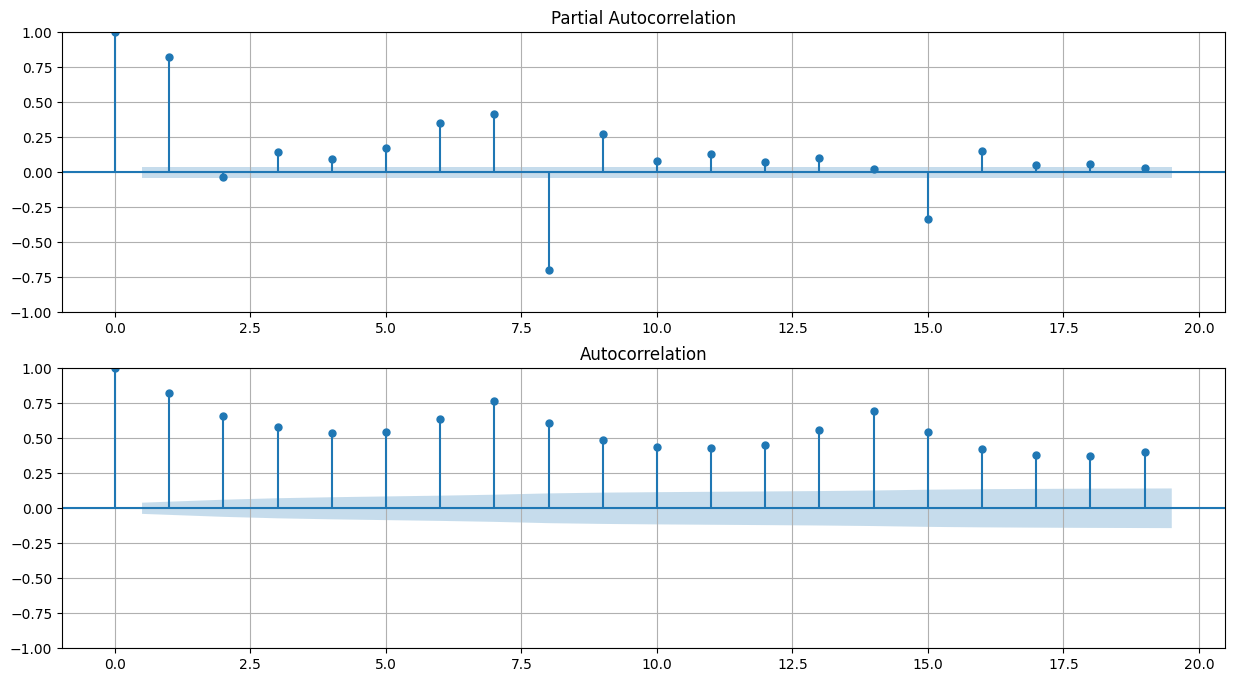

In [19]:
plot_PACF_ACF(df["electricity"], lag_num=19)

In [20]:
train_d, test_x, test_y = df[:-60], df[-60:].iloc[:,1:], df[-60:]["electricity"]

In [27]:
cat_dict = {"month": ['January','February', 'March','April','May','June', 'July', 'August', 'September', 'October', 'November', 'December'],
 "week_day": ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']}

In [28]:
my_xgb = xgboost_forecaster(n_lag=21, target_col="electricity", cat_dict=cat_dict)

TypeError: __init__() got an unexpected keyword argument 'cat_dict'

In [23]:
model = my_xgb.fit(train_d)

In [24]:
my_preds = my_xgb.forecast(model, n_ahead=len(test_x), x_test=test_x)

In [26]:
((np.array(test_y)-my_preds)/test_y).mean()*100

15.26251414808835

In [ ]:
my_preds.shape

(60,)

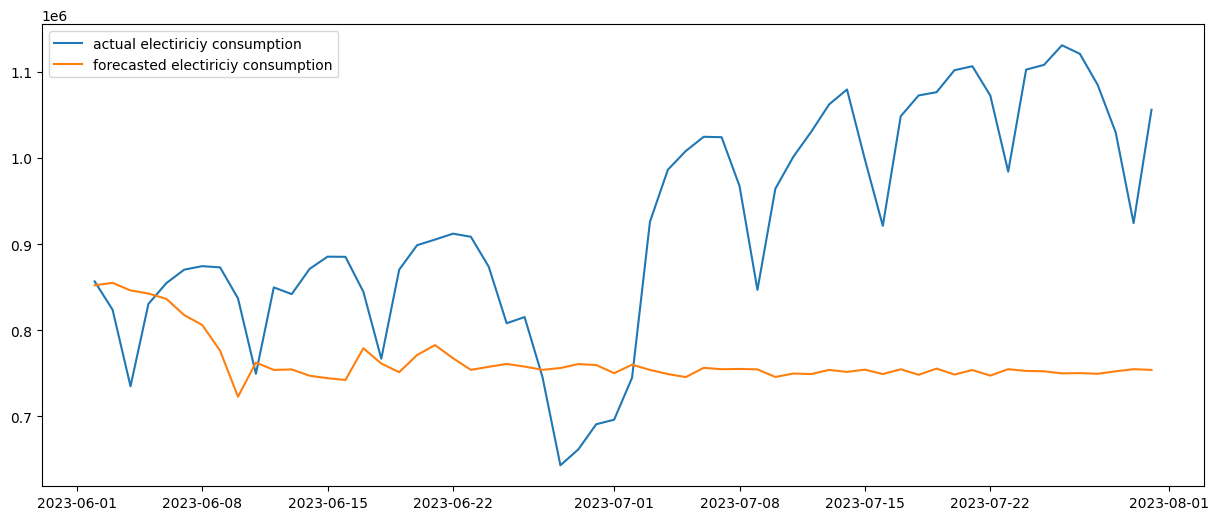

In [13]:
fig, ax = plt.subplots(figsize = (15,6))
ax.plot(test_y.index,test_y, label = "actual electiriciy consumption", color = "C0")
ax.plot(test_y.index, my_preds, label = "forecasted electiriciy consumption", color = "C1")
plt.legend(loc="upper left")
plt.show()

In [ ]:
tunned_cat = my_light.tune_model(train_d, cv_split=5, test_size=30)

  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

[LightGBM] [Warning] feature_fraction is set=0.9879300000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9879300000000001
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=24.3031, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=24.3031
[LightGBM] [Warning] bagging_fraction is set=0.6913100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6913100000000001
[LightGBM] [Warning] lambda_l1 is set=2.237, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.237
[LightGBM] [Warning] lambda_l2 is set=3.6551000000000005, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6551000000000005
  0%|          | 0/100 [00:00<?, ?trial/s, best loss=?]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.9879300000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9879300000000001
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=24.3031, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=24.3031
[LightGBM] [Warning] bagging_fraction is set=0.6913100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6913100000000001
[LightGBM] [Warning] lambda_l1 is set=2.237, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.237
[LightGBM] [Warning] lambda_l2 is set=3.6551000000000005, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6551000000000005
  0%|          | 0/100 [00:04<?, ?trial/s, best loss=?]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.9879300000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9879300000000001
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=24.3031, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=24.3031
[LightGBM] [Warning] bagging_fraction is set=0.6913100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6913100000000001
[LightGBM] [Warning] lambda_l1 is set=2.237, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.237
[LightGBM] [Warning] lambda_l2 is set=3.6551000000000005, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6551000000000005
  0%|          | 0/100 [00:08<?, ?trial/s, best loss=?]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.9879300000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9879300000000001
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=24.3031, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=24.3031
[LightGBM] [Warning] bagging_fraction is set=0.6913100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6913100000000001
[LightGBM] [Warning] lambda_l1 is set=2.237, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.237
[LightGBM] [Warning] lambda_l2 is set=3.6551000000000005, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6551000000000005
  0%|          | 0/100 [00:12<?, ?trial/s, best loss=?]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.9879300000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9879300000000001
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=24.3031, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=24.3031
[LightGBM] [Warning] bagging_fraction is set=0.6913100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6913100000000001
[LightGBM] [Warning] lambda_l1 is set=2.237, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.237
[LightGBM] [Warning] lambda_l2 is set=3.6551000000000005, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.6551000000000005
  0%|          | 0/100 [00:15<?, ?trial/s, best loss=?]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



SCORE:                                                 
5.545021968510888                                      
[LightGBM] [Warning] feature_fraction is set=0.5634, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5634
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=41.49096, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=41.49096
[LightGBM] [Warning] bagging_fraction is set=0.58126, subsample=1.0 will be ignored. Current value: bagging_fraction=0.58126
[LightGBM] [Warning] lambda_l1 is set=9.75298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.75298
[LightGBM] [Warning] lambda_l2 is set=8.33925, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.33925
  1%|          | 1/100 [00:18<29:41, 18.00s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.5634, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5634
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=41.49096, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=41.49096
[LightGBM] [Warning] bagging_fraction is set=0.58126, subsample=1.0 will be ignored. Current value: bagging_fraction=0.58126
[LightGBM] [Warning] lambda_l1 is set=9.75298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.75298
[LightGBM] [Warning] lambda_l2 is set=8.33925, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.33925
  1%|          | 1/100 [00:19<29:41, 18.00s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.5634, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5634
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=41.49096, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=41.49096
[LightGBM] [Warning] bagging_fraction is set=0.58126, subsample=1.0 will be ignored. Current value: bagging_fraction=0.58126
[LightGBM] [Warning] lambda_l1 is set=9.75298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.75298
[LightGBM] [Warning] lambda_l2 is set=8.33925, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.33925
  1%|          | 1/100 [00:21<29:41, 18.00s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.5634, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5634
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=41.49096, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=41.49096
[LightGBM] [Warning] bagging_fraction is set=0.58126, subsample=1.0 will be ignored. Current value: bagging_fraction=0.58126
[LightGBM] [Warning] lambda_l1 is set=9.75298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.75298
[LightGBM] [Warning] lambda_l2 is set=8.33925, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.33925
  1%|          | 1/100 [00:23<29:41, 18.00s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.5634, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5634
[LightGBM] [Warning] min_data_in_leaf is set=33, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=33
[LightGBM] [Warning] min_gain_to_split is set=41.49096, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=41.49096
[LightGBM] [Warning] bagging_fraction is set=0.58126, subsample=1.0 will be ignored. Current value: bagging_fraction=0.58126
[LightGBM] [Warning] lambda_l1 is set=9.75298, reg_alpha=0.0 will be ignored. Current value: lambda_l1=9.75298
[LightGBM] [Warning] lambda_l2 is set=8.33925, reg_lambda=0.0 will be ignored. Current value: lambda_l2=8.33925
  1%|          | 1/100 [00:24<29:41, 18.00s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



SCORE:                                                                          
6.137579876061515                                                               
[LightGBM] [Warning] feature_fraction is set=0.58182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.58182
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=17.55011, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=17.55011
[LightGBM] [Warning] bagging_fraction is set=0.86223, subsample=1.0 will be ignored. Current value: bagging_fraction=0.86223
[LightGBM] [Warning] lambda_l1 is set=0.06255000000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06255000000000001
[LightGBM] [Warning] lambda_l2 is set=1.02411, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.02411
  2%|▏         | 2/100 [00:26<20:35, 12.61s/trial, best loss: 5.54502196851088

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.58182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.58182
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=17.55011, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=17.55011
[LightGBM] [Warning] bagging_fraction is set=0.86223, subsample=1.0 will be ignored. Current value: bagging_fraction=0.86223
[LightGBM] [Warning] lambda_l1 is set=0.06255000000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06255000000000001
[LightGBM] [Warning] lambda_l2 is set=1.02411, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.02411
  2%|▏         | 2/100 [00:28<20:35, 12.61s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.58182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.58182
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=17.55011, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=17.55011
[LightGBM] [Warning] bagging_fraction is set=0.86223, subsample=1.0 will be ignored. Current value: bagging_fraction=0.86223
[LightGBM] [Warning] lambda_l1 is set=0.06255000000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06255000000000001
[LightGBM] [Warning] lambda_l2 is set=1.02411, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.02411
  2%|▏         | 2/100 [00:29<20:35, 12.61s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.58182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.58182
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=17.55011, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=17.55011
[LightGBM] [Warning] bagging_fraction is set=0.86223, subsample=1.0 will be ignored. Current value: bagging_fraction=0.86223
[LightGBM] [Warning] lambda_l1 is set=0.06255000000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06255000000000001
[LightGBM] [Warning] lambda_l2 is set=1.02411, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.02411
  2%|▏         | 2/100 [00:30<20:35, 12.61s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.58182, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.58182
[LightGBM] [Warning] min_data_in_leaf is set=35, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=35
[LightGBM] [Warning] min_gain_to_split is set=17.55011, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=17.55011
[LightGBM] [Warning] bagging_fraction is set=0.86223, subsample=1.0 will be ignored. Current value: bagging_fraction=0.86223
[LightGBM] [Warning] lambda_l1 is set=0.06255000000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.06255000000000001
[LightGBM] [Warning] lambda_l2 is set=1.02411, reg_lambda=0.0 will be ignored. Current value: lambda_l2=1.02411
  2%|▏         | 2/100 [00:31<20:35, 12.61s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



SCORE:                                                                          
6.264890412513454                                                               
[LightGBM] [Warning] feature_fraction is set=0.7869100000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7869100000000001
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=12.223880000000001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.223880000000001
[LightGBM] [Warning] bagging_fraction is set=0.9458900000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9458900000000001
[LightGBM] [Warning] lambda_l1 is set=5.868930000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.868930000000001
[LightGBM] [Warning] lambda_l2 is set=4.422350000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.42235000000000

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.7869100000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7869100000000001
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=12.223880000000001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.223880000000001
[LightGBM] [Warning] bagging_fraction is set=0.9458900000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9458900000000001
[LightGBM] [Warning] lambda_l1 is set=5.868930000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.868930000000001
[LightGBM] [Warning] lambda_l2 is set=4.422350000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.422350000000001
  3%|▎         | 3/100 [00:35<15:47,  9.77s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.7869100000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7869100000000001
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=12.223880000000001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.223880000000001
[LightGBM] [Warning] bagging_fraction is set=0.9458900000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9458900000000001
[LightGBM] [Warning] lambda_l1 is set=5.868930000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.868930000000001
[LightGBM] [Warning] lambda_l2 is set=4.422350000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.422350000000001
  3%|▎         | 3/100 [00:37<15:47,  9.77s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.7869100000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7869100000000001
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=12.223880000000001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.223880000000001
[LightGBM] [Warning] bagging_fraction is set=0.9458900000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9458900000000001
[LightGBM] [Warning] lambda_l1 is set=5.868930000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.868930000000001
[LightGBM] [Warning] lambda_l2 is set=4.422350000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.422350000000001
  3%|▎         | 3/100 [00:40<15:47,  9.77s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.7869100000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7869100000000001
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=12.223880000000001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=12.223880000000001
[LightGBM] [Warning] bagging_fraction is set=0.9458900000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9458900000000001
[LightGBM] [Warning] lambda_l1 is set=5.868930000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.868930000000001
[LightGBM] [Warning] lambda_l2 is set=4.422350000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.422350000000001
  3%|▎         | 3/100 [00:42<15:47,  9.77s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



SCORE:                                                                          
6.152172300976868                                                               
[LightGBM] [Warning] feature_fraction is set=0.61999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.61999
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=41.94671, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=41.94671
[LightGBM] [Warning] bagging_fraction is set=0.51997, subsample=1.0 will be ignored. Current value: bagging_fraction=0.51997
[LightGBM] [Warning] lambda_l1 is set=2.0417300000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0417300000000003
[LightGBM] [Warning] lambda_l2 is set=0.17495000000000002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17495000000000002
  4%|▍         | 4/100 [00:45<17:02, 10.65s/trial, best 

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.61999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.61999
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=41.94671, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=41.94671
[LightGBM] [Warning] bagging_fraction is set=0.51997, subsample=1.0 will be ignored. Current value: bagging_fraction=0.51997
[LightGBM] [Warning] lambda_l1 is set=2.0417300000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0417300000000003
[LightGBM] [Warning] lambda_l2 is set=0.17495000000000002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17495000000000002
  4%|▍         | 4/100 [00:46<17:02, 10.65s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.61999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.61999
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=41.94671, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=41.94671
[LightGBM] [Warning] bagging_fraction is set=0.51997, subsample=1.0 will be ignored. Current value: bagging_fraction=0.51997
[LightGBM] [Warning] lambda_l1 is set=2.0417300000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0417300000000003
[LightGBM] [Warning] lambda_l2 is set=0.17495000000000002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17495000000000002
  4%|▍         | 4/100 [00:48<17:02, 10.65s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.61999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.61999
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=41.94671, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=41.94671
[LightGBM] [Warning] bagging_fraction is set=0.51997, subsample=1.0 will be ignored. Current value: bagging_fraction=0.51997
[LightGBM] [Warning] lambda_l1 is set=2.0417300000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0417300000000003
[LightGBM] [Warning] lambda_l2 is set=0.17495000000000002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17495000000000002
  4%|▍         | 4/100 [00:49<17:02, 10.65s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.61999, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.61999
[LightGBM] [Warning] min_data_in_leaf is set=45, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=45
[LightGBM] [Warning] min_gain_to_split is set=41.94671, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=41.94671
[LightGBM] [Warning] bagging_fraction is set=0.51997, subsample=1.0 will be ignored. Current value: bagging_fraction=0.51997
[LightGBM] [Warning] lambda_l1 is set=2.0417300000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=2.0417300000000003
[LightGBM] [Warning] lambda_l2 is set=0.17495000000000002, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.17495000000000002
  4%|▍         | 4/100 [00:50<17:02, 10.65s/trial, best loss: 5.545021968510888]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



SCORE:                                                                          
5.375907436561501                                                               
[LightGBM] [Warning] feature_fraction is set=0.8971800000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8971800000000001
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=15.88667, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=15.88667
[LightGBM] [Warning] bagging_fraction is set=0.9017000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9017000000000001
[LightGBM] [Warning] lambda_l1 is set=7.2177500000000006, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.2177500000000006
[LightGBM] [Warning] lambda_l2 is set=9.31324, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.31324
  5%|▌         | 5/100 [00:51<14:30,

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.8971800000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8971800000000001
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=15.88667, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=15.88667
[LightGBM] [Warning] bagging_fraction is set=0.9017000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9017000000000001
[LightGBM] [Warning] lambda_l1 is set=7.2177500000000006, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.2177500000000006
[LightGBM] [Warning] lambda_l2 is set=9.31324, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.31324
  5%|▌         | 5/100 [00:53<14:30,  9.16s/trial, best loss: 5.375907436561501]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.8971800000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8971800000000001
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=15.88667, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=15.88667
[LightGBM] [Warning] bagging_fraction is set=0.9017000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9017000000000001
[LightGBM] [Warning] lambda_l1 is set=7.2177500000000006, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.2177500000000006
[LightGBM] [Warning] lambda_l2 is set=9.31324, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.31324
  5%|▌         | 5/100 [00:55<14:30,  9.16s/trial, best loss: 5.375907436561501]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.8971800000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8971800000000001
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=15.88667, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=15.88667
[LightGBM] [Warning] bagging_fraction is set=0.9017000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9017000000000001
[LightGBM] [Warning] lambda_l1 is set=7.2177500000000006, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.2177500000000006
[LightGBM] [Warning] lambda_l2 is set=9.31324, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.31324
  5%|▌         | 5/100 [00:57<14:30,  9.16s/trial, best loss: 5.375907436561501]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.8971800000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8971800000000001
[LightGBM] [Warning] min_data_in_leaf is set=27, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=27
[LightGBM] [Warning] min_gain_to_split is set=15.88667, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=15.88667
[LightGBM] [Warning] bagging_fraction is set=0.9017000000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9017000000000001
[LightGBM] [Warning] lambda_l1 is set=7.2177500000000006, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.2177500000000006
[LightGBM] [Warning] lambda_l2 is set=9.31324, reg_lambda=0.0 will be ignored. Current value: lambda_l2=9.31324
  5%|▌         | 5/100 [00:59<14:30,  9.16s/trial, best loss: 5.375907436561501]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



SCORE:                                                                          
6.437383443552889                                                               
[LightGBM] [Warning] feature_fraction is set=0.97135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.97135
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=23.193, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=23.193
[LightGBM] [Warning] bagging_fraction is set=0.7145600000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7145600000000001
[LightGBM] [Warning] lambda_l1 is set=3.6409800000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6409800000000003
[LightGBM] [Warning] lambda_l2 is set=6.15343, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.15343
  6%|▌         | 6/100 [01:01<14:30,  9.26s/trial, best loss: 

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.97135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.97135
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=23.193, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=23.193
[LightGBM] [Warning] bagging_fraction is set=0.7145600000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7145600000000001
[LightGBM] [Warning] lambda_l1 is set=3.6409800000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6409800000000003
[LightGBM] [Warning] lambda_l2 is set=6.15343, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.15343
  6%|▌         | 6/100 [01:02<14:30,  9.26s/trial, best loss: 5.375907436561501]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.97135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.97135
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=23.193, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=23.193
[LightGBM] [Warning] bagging_fraction is set=0.7145600000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7145600000000001
[LightGBM] [Warning] lambda_l1 is set=3.6409800000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6409800000000003
[LightGBM] [Warning] lambda_l2 is set=6.15343, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.15343
  6%|▌         | 6/100 [01:04<14:30,  9.26s/trial, best loss: 5.375907436561501]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.97135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.97135
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=23.193, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=23.193
[LightGBM] [Warning] bagging_fraction is set=0.7145600000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7145600000000001
[LightGBM] [Warning] lambda_l1 is set=3.6409800000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6409800000000003
[LightGBM] [Warning] lambda_l2 is set=6.15343, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.15343
  6%|▌         | 6/100 [01:06<14:30,  9.26s/trial, best loss: 5.375907436561501]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.97135, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.97135
[LightGBM] [Warning] min_data_in_leaf is set=13, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=13
[LightGBM] [Warning] min_gain_to_split is set=23.193, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=23.193
[LightGBM] [Warning] bagging_fraction is set=0.7145600000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7145600000000001
[LightGBM] [Warning] lambda_l1 is set=3.6409800000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=3.6409800000000003
[LightGBM] [Warning] lambda_l2 is set=6.15343, reg_lambda=0.0 will be ignored. Current value: lambda_l2=6.15343
  6%|▌         | 6/100 [01:07<14:30,  9.26s/trial, best loss: 5.375907436561501]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



SCORE:                                                                          
6.43480395773482                                                                
[LightGBM] [Warning] feature_fraction is set=0.94749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.94749
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=7.751690000000001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.751690000000001
[LightGBM] [Warning] bagging_fraction is set=0.5693100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5693100000000001
[LightGBM] [Warning] lambda_l1 is set=4.39893, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.39893
[LightGBM] [Warning] lambda_l2 is set=4.796200000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.796200000000001
  7%|▋         | 7/100 [01:09<13:34,  8.75

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.94749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.94749
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=7.751690000000001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.751690000000001
[LightGBM] [Warning] bagging_fraction is set=0.5693100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5693100000000001
[LightGBM] [Warning] lambda_l1 is set=4.39893, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.39893
[LightGBM] [Warning] lambda_l2 is set=4.796200000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.796200000000001
  7%|▋         | 7/100 [01:11<13:34,  8.75s/trial, best loss: 5.375907436561501]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.94749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.94749
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=7.751690000000001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.751690000000001
[LightGBM] [Warning] bagging_fraction is set=0.5693100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5693100000000001
[LightGBM] [Warning] lambda_l1 is set=4.39893, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.39893
[LightGBM] [Warning] lambda_l2 is set=4.796200000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.796200000000001
  7%|▋         | 7/100 [01:15<13:34,  8.75s/trial, best loss: 5.375907436561501]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.94749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.94749
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=7.751690000000001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.751690000000001
[LightGBM] [Warning] bagging_fraction is set=0.5693100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5693100000000001
[LightGBM] [Warning] lambda_l1 is set=4.39893, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.39893
[LightGBM] [Warning] lambda_l2 is set=4.796200000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.796200000000001
  7%|▋         | 7/100 [01:17<13:34,  8.75s/trial, best loss: 5.375907436561501]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.94749, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.94749
[LightGBM] [Warning] min_data_in_leaf is set=24, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=24
[LightGBM] [Warning] min_gain_to_split is set=7.751690000000001, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=7.751690000000001
[LightGBM] [Warning] bagging_fraction is set=0.5693100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5693100000000001
[LightGBM] [Warning] lambda_l1 is set=4.39893, reg_alpha=0.0 will be ignored. Current value: lambda_l1=4.39893
[LightGBM] [Warning] lambda_l2 is set=4.796200000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.796200000000001
  7%|▋         | 7/100 [01:20<13:34,  8.75s/trial, best loss: 5.375907436561501]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



SCORE:                                                                          
4.830652356773798                                                               
[LightGBM] [Warning] feature_fraction is set=0.8911300000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8911300000000001
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_gain_to_split is set=13.67036, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.67036
[LightGBM] [Warning] bagging_fraction is set=0.9557200000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9557200000000001
[LightGBM] [Warning] lambda_l1 is set=7.600320000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.600320000000001
[LightGBM] [Warning] lambda_l2 is set=3.9254300000000004, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9254300000000004
  8%|▊         |

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.8911300000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8911300000000001
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_gain_to_split is set=13.67036, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.67036
[LightGBM] [Warning] bagging_fraction is set=0.9557200000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9557200000000001
[LightGBM] [Warning] lambda_l1 is set=7.600320000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.600320000000001
[LightGBM] [Warning] lambda_l2 is set=3.9254300000000004, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9254300000000004
  8%|▊         | 8/100 [01:25<16:09, 10.54s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.8911300000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8911300000000001
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_gain_to_split is set=13.67036, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.67036
[LightGBM] [Warning] bagging_fraction is set=0.9557200000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9557200000000001
[LightGBM] [Warning] lambda_l1 is set=7.600320000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.600320000000001
[LightGBM] [Warning] lambda_l2 is set=3.9254300000000004, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9254300000000004
  8%|▊         | 8/100 [01:26<16:09, 10.54s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.8911300000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8911300000000001
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_gain_to_split is set=13.67036, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.67036
[LightGBM] [Warning] bagging_fraction is set=0.9557200000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9557200000000001
[LightGBM] [Warning] lambda_l1 is set=7.600320000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.600320000000001
[LightGBM] [Warning] lambda_l2 is set=3.9254300000000004, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9254300000000004
  8%|▊         | 8/100 [01:28<16:09, 10.54s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.8911300000000001, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8911300000000001
[LightGBM] [Warning] min_data_in_leaf is set=21, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=21
[LightGBM] [Warning] min_gain_to_split is set=13.67036, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=13.67036
[LightGBM] [Warning] bagging_fraction is set=0.9557200000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9557200000000001
[LightGBM] [Warning] lambda_l1 is set=7.600320000000001, reg_alpha=0.0 will be ignored. Current value: lambda_l1=7.600320000000001
[LightGBM] [Warning] lambda_l2 is set=3.9254300000000004, reg_lambda=0.0 will be ignored. Current value: lambda_l2=3.9254300000000004
  8%|▊         | 8/100 [01:29<16:09, 10.54s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



SCORE:                                                                          
6.5153390816950765                                                              
[LightGBM] [Warning] feature_fraction is set=0.60751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60751
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=11.07282, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.07282
[LightGBM] [Warning] bagging_fraction is set=0.7728100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7728100000000001
[LightGBM] [Warning] lambda_l1 is set=0.40045000000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.40045000000000003
[LightGBM] [Warning] lambda_l2 is set=4.29912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.29912
  9%|▉         | 9/100 [01:31<14:43,  9.71s/trial, best 

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.60751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60751
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=11.07282, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.07282
[LightGBM] [Warning] bagging_fraction is set=0.7728100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7728100000000001
[LightGBM] [Warning] lambda_l1 is set=0.40045000000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.40045000000000003
[LightGBM] [Warning] lambda_l2 is set=4.29912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.29912
  9%|▉         | 9/100 [01:32<14:43,  9.71s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.60751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60751
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=11.07282, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.07282
[LightGBM] [Warning] bagging_fraction is set=0.7728100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7728100000000001
[LightGBM] [Warning] lambda_l1 is set=0.40045000000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.40045000000000003
[LightGBM] [Warning] lambda_l2 is set=4.29912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.29912
  9%|▉         | 9/100 [01:34<14:43,  9.71s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.60751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60751
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=11.07282, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.07282
[LightGBM] [Warning] bagging_fraction is set=0.7728100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7728100000000001
[LightGBM] [Warning] lambda_l1 is set=0.40045000000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.40045000000000003
[LightGBM] [Warning] lambda_l2 is set=4.29912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.29912
  9%|▉         | 9/100 [01:35<14:43,  9.71s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.60751, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60751
[LightGBM] [Warning] min_data_in_leaf is set=38, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=38
[LightGBM] [Warning] min_gain_to_split is set=11.07282, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=11.07282
[LightGBM] [Warning] bagging_fraction is set=0.7728100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7728100000000001
[LightGBM] [Warning] lambda_l1 is set=0.40045000000000003, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.40045000000000003
[LightGBM] [Warning] lambda_l2 is set=4.29912, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.29912
  9%|▉         | 9/100 [01:37<14:43,  9.71s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



SCORE:                                                                          
6.273066991953802                                                               
[LightGBM] [Warning] feature_fraction is set=0.60568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60568
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=45.281620000000004, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=45.281620000000004
[LightGBM] [Warning] bagging_fraction is set=0.51026, subsample=1.0 will be ignored. Current value: bagging_fraction=0.51026
[LightGBM] [Warning] lambda_l1 is set=1.51245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.51245
[LightGBM] [Warning] lambda_l2 is set=7.551640000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.551640000000001
 10%|█         | 10/100 [01:39<13:40,  9.12s/trial, best loss:

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.60568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60568
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=45.281620000000004, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=45.281620000000004
[LightGBM] [Warning] bagging_fraction is set=0.51026, subsample=1.0 will be ignored. Current value: bagging_fraction=0.51026
[LightGBM] [Warning] lambda_l1 is set=1.51245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.51245
[LightGBM] [Warning] lambda_l2 is set=7.551640000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.551640000000001
 10%|█         | 10/100 [01:41<13:40,  9.12s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.60568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60568
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=45.281620000000004, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=45.281620000000004
[LightGBM] [Warning] bagging_fraction is set=0.51026, subsample=1.0 will be ignored. Current value: bagging_fraction=0.51026
[LightGBM] [Warning] lambda_l1 is set=1.51245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.51245
[LightGBM] [Warning] lambda_l2 is set=7.551640000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.551640000000001
 10%|█         | 10/100 [01:44<13:40,  9.12s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.60568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60568
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=45.281620000000004, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=45.281620000000004
[LightGBM] [Warning] bagging_fraction is set=0.51026, subsample=1.0 will be ignored. Current value: bagging_fraction=0.51026
[LightGBM] [Warning] lambda_l1 is set=1.51245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.51245
[LightGBM] [Warning] lambda_l2 is set=7.551640000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.551640000000001
 10%|█         | 10/100 [01:46<13:40,  9.12s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.60568, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.60568
[LightGBM] [Warning] min_data_in_leaf is set=10, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=10
[LightGBM] [Warning] min_gain_to_split is set=45.281620000000004, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=45.281620000000004
[LightGBM] [Warning] bagging_fraction is set=0.51026, subsample=1.0 will be ignored. Current value: bagging_fraction=0.51026
[LightGBM] [Warning] lambda_l1 is set=1.51245, reg_alpha=0.0 will be ignored. Current value: lambda_l1=1.51245
[LightGBM] [Warning] lambda_l2 is set=7.551640000000001, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.551640000000001
 10%|█         | 10/100 [01:48<13:40,  9.12s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



SCORE:                                                                           
5.4632514534298675                                                               
[LightGBM] [Warning] feature_fraction is set=0.54644, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.54644
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_gain_to_split is set=37.82334, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=37.82334
[LightGBM] [Warning] bagging_fraction is set=0.7078700000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7078700000000001
[LightGBM] [Warning] lambda_l1 is set=5.80961, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.80961
[LightGBM] [Warning] lambda_l2 is set=7.75067, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.75067
 11%|█         | 11/100 [01:51<14:56, 10.07s/trial, best loss: 4.8306523567737

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.54644, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.54644
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_gain_to_split is set=37.82334, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=37.82334
[LightGBM] [Warning] bagging_fraction is set=0.7078700000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7078700000000001
[LightGBM] [Warning] lambda_l1 is set=5.80961, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.80961
[LightGBM] [Warning] lambda_l2 is set=7.75067, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.75067
 11%|█         | 11/100 [01:52<14:56, 10.07s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.54644, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.54644
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_gain_to_split is set=37.82334, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=37.82334
[LightGBM] [Warning] bagging_fraction is set=0.7078700000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7078700000000001
[LightGBM] [Warning] lambda_l1 is set=5.80961, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.80961
[LightGBM] [Warning] lambda_l2 is set=7.75067, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.75067
 11%|█         | 11/100 [01:53<14:56, 10.07s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.54644, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.54644
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_gain_to_split is set=37.82334, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=37.82334
[LightGBM] [Warning] bagging_fraction is set=0.7078700000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7078700000000001
[LightGBM] [Warning] lambda_l1 is set=5.80961, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.80961
[LightGBM] [Warning] lambda_l2 is set=7.75067, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.75067
 11%|█         | 11/100 [01:54<14:56, 10.07s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.54644, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.54644
[LightGBM] [Warning] min_data_in_leaf is set=20, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=20
[LightGBM] [Warning] min_gain_to_split is set=37.82334, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=37.82334
[LightGBM] [Warning] bagging_fraction is set=0.7078700000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7078700000000001
[LightGBM] [Warning] lambda_l1 is set=5.80961, reg_alpha=0.0 will be ignored. Current value: lambda_l1=5.80961
[LightGBM] [Warning] lambda_l2 is set=7.75067, reg_lambda=0.0 will be ignored. Current value: lambda_l2=7.75067
 11%|█         | 11/100 [01:56<14:56, 10.07s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



SCORE:                                                                           
5.315486838160988                                                                
[LightGBM] [Warning] feature_fraction is set=0.64354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.64354
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=21.02757, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=21.02757
[LightGBM] [Warning] bagging_fraction is set=0.9884100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9884100000000001
[LightGBM] [Warning] lambda_l1 is set=0.05952, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05952
[LightGBM] [Warning] lambda_l2 is set=4.06116, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.06116
 12%|█▏        | 12/100 [01:57<12:56,  8.83s/trial, best loss: 4.8306523567737

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.64354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.64354
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=21.02757, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=21.02757
[LightGBM] [Warning] bagging_fraction is set=0.9884100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9884100000000001
[LightGBM] [Warning] lambda_l1 is set=0.05952, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05952
[LightGBM] [Warning] lambda_l2 is set=4.06116, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.06116
 12%|█▏        | 12/100 [01:58<12:56,  8.83s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



[LightGBM] [Warning] feature_fraction is set=0.64354, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.64354
[LightGBM] [Warning] min_data_in_leaf is set=44, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=44
[LightGBM] [Warning] min_gain_to_split is set=21.02757, min_split_gain=0.0 will be ignored. Current value: min_gain_to_split=21.02757
[LightGBM] [Warning] bagging_fraction is set=0.9884100000000001, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9884100000000001
[LightGBM] [Warning] lambda_l1 is set=0.05952, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.05952
[LightGBM] [Warning] lambda_l2 is set=4.06116, reg_lambda=0.0 will be ignored. Current value: lambda_l2=4.06116
 12%|█▏        | 12/100 [02:01<12:56,  8.83s/trial, best loss: 4.830652356773798]

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")

c:\Users\musta\AppData\Local\Programs\Python\Python39\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')



 12%|█▏        | 12/100 [02:01<14:49, 10.11s/trial, best loss: 4.830652356773798]


KeyboardInterrupt: 

In [ ]:
cat_params = tunned_cat.tune_model(df=train_d, cv_split=5, test_size=30, eval_num = 3)

SCORE:                                               
4.6049710971003295                                   
SCORE:                                                                         
4.885730965349299                                                              
SCORE:                                                                          
4.496556453003342                                                               
100%|██████████| 3/3 [08:15<00:00, 165.32s/trial, best loss: 4.496556453003342] 


In [ ]:
cat_params

{'bagging_temperature': 27.022000000000002,
 'depth': 5,
 'iterations': 1420,
 'l2_leaf_reg': 2.0631,
 'learning_rate': 0.127}